### Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset

data = pd.read_csv("../Dataset/bank_data_C.csv")
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
data.describe(include = 'all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [6]:
data.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

### Data Cleaning & Features Engineering

In [8]:
data.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [9]:
#Checking for missing value

data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [10]:
#Convert CustomerDOB and transaction date to datetime

data["CustomerDOB"] = pd.to_datetime(data["CustomerDOB"])
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"], format = '%d/%m/%y')

C:\Users\Williams\AppData\Local\Temp\ipykernel_20120\4069038353.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["CustomerDOB"] = pd.to_datetime(data["CustomerDOB"])


In [12]:
#Checking for unique value
data["TransactionDate"].unique()

<DatetimeArray>
['2016-08-02 00:00:00', '2016-08-01 00:00:00', '2016-08-03 00:00:00',
 '2016-08-05 00:00:00', '2016-08-04 00:00:00', '2016-08-06 00:00:00',
 '2016-08-09 00:00:00', '2016-08-08 00:00:00', '2016-08-12 00:00:00',
 '2016-08-07 00:00:00', '2016-10-21 00:00:00', '2016-10-16 00:00:00',
 '2016-08-10 00:00:00', '2016-08-14 00:00:00', '2016-08-17 00:00:00',
 '2016-08-21 00:00:00', '2016-08-19 00:00:00', '2016-08-24 00:00:00',
 '2016-08-22 00:00:00', '2016-08-29 00:00:00', '2016-08-31 00:00:00',
 '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-08-13 00:00:00',
 '2016-08-25 00:00:00', '2016-08-28 00:00:00', '2016-08-15 00:00:00',
 '2016-08-27 00:00:00', '2016-08-20 00:00:00', '2016-08-23 00:00:00',
 '2016-08-30 00:00:00', '2016-08-11 00:00:00', '2016-08-16 00:00:00',
 '2016-08-26 00:00:00', '2016-09-27 00:00:00', '2016-08-18 00:00:00',
 '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-30 00:00:00',
 '2016-09-03 00:00:00', '2016-09-02 00:00:00', '2016-09-01 00:00:00',
 '20

In [13]:
#Calculating the age of every customer by subtracting the transaction date from DOB
#We first create a new column for age

def calculate_age(data):
    data['Age'] = data["TransactionDate"].dt.year - data["CustomerDOB"].dt.year
    return data

In [14]:
data = calculate_age(data)
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


In [15]:
#Observe and correct Customers negative age
data[data["Age"] < 0]["CustomerDOB"]

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104834, dtype: datetime64[ns]

In [16]:
#Define a function to correct a negative age by adjusting the date of the year

def adjust_year(date):
    if date.year>2016:
        date = date.replace(year= date.year - 100)
    return date

In [17]:
data["CustomerDOB"] = data["CustomerDOB"].apply(adjust_year)

In [18]:
data = calculate_age(data)

In [19]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


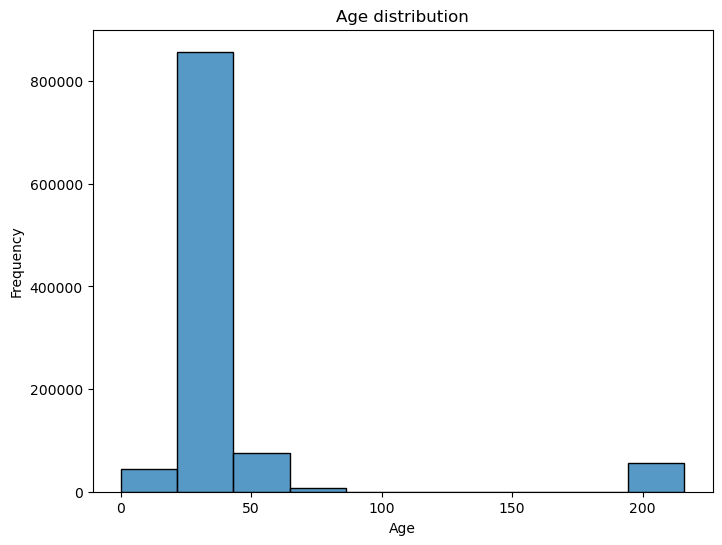

In [20]:
#To observe age distribution 
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], bins = 10, kde = False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

In [21]:
#examine the wrong entry
data[data["Age"] > 100]["CustomerDOB"].unique()

<DatetimeArray>
['1800-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [22]:
#Removing the outliers as a result of wrong entries
#Define function to fix outliers in age

def replace_age_outliers(data):
    DOB_threshold = 1900
    age_outliers = data[data["CustomerDOB"].dt.year < DOB_threshold].index

    mean_DOB = data[~data.index.isin(age_outliers)]["CustomerDOB"].mean()

    data.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return data
    

In [23]:
data = replace_age_outliers(data)
data = calculate_age(data)

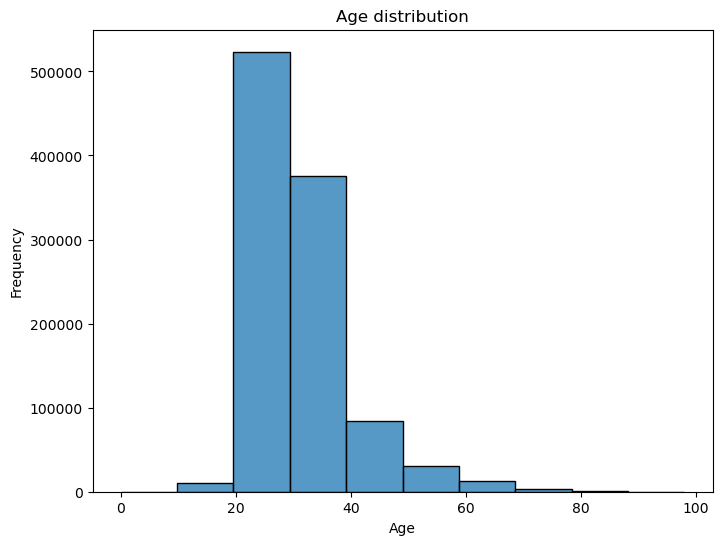

In [24]:
#To observe age distribution 
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], bins = 10, kde = False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

In [25]:
#To observe Gender column

data["CustGender"].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [26]:
#Replace T in gender with M
data["CustGender"] = data["CustGender"].replace('T', 'M')

In [27]:
data["CustGender"].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

In [28]:
#To observe location column
data["CustLocation"].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

In [30]:
#To observe Account balance column
data["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

In [34]:
#observe transaction amount

data[data["TransactionAmount (INR)"]== 0].value_counts().sum()

820

In [36]:
#Drop all the rows with zero transactions

data.drop(data[data["TransactionAmount (INR)"] == 0].index.tolist(), axis = 0, inplace = True)

In [37]:
data[data["TransactionAmount (INR)"]== 0].value_counts().sum()

0

In [38]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


### Exploratory Data Analysis

In [41]:
#Checking for customer unique ID
data["CustomerID"].nunique()

878763

In [66]:
data.shape

(1040794, 10)

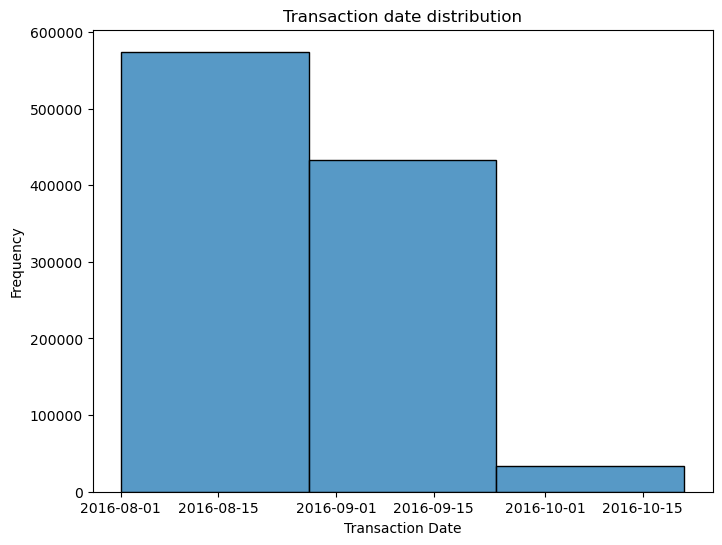

In [74]:
#plot a distribution for data across the unique transaction date
#based on the graph we only have 3 months worth of data

plt.figure(figsize=(8,6))
sns.histplot(data["TransactionDate"], bins = 3, kde = False)
plt.xlabel("Transaction Date")
plt.ylabel("Frequency")
plt.title("Transaction date distribution")
plt.show()

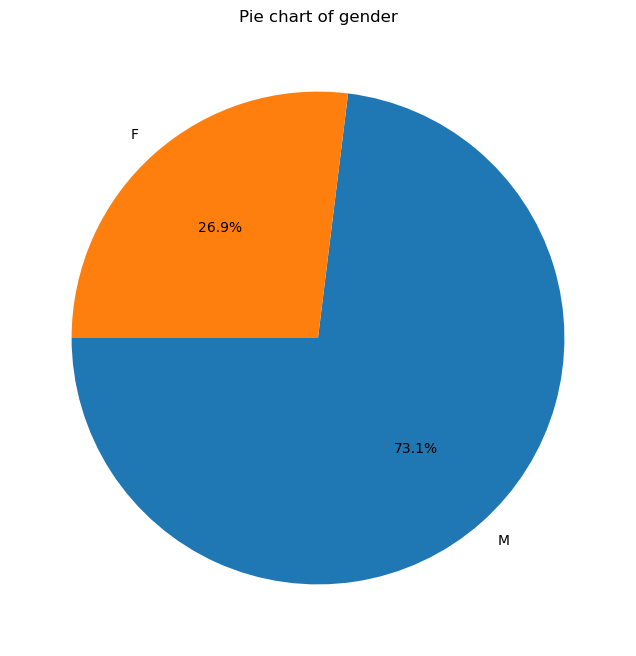

In [82]:
#Checking the distribution for Gender with pie chart

plt.figure(figsize=(8,8))
gender_count = data["CustGender"].value_counts()
plt.pie(gender_count, labels = gender_count.index, autopct= '%1.1f%%', startangle = 180)
plt.title("Pie chart of gender")
plt.show()

### RFM Analysis

In [87]:
data.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


### Recency

In [90]:
#To understand how frequent a customer transact 
#To obtain a maximum day 
day = data["TransactionDate"].max()

In [92]:
day

Timestamp('2016-10-21 00:00:00')

In [96]:
recency = data.groupby(['CustomerID']).agg({"TransactionDate": lambda x: ((day - x.max()).days) +1})

In [101]:
recency.head()

,TransactionDate
CustomerID,
C1010011,26
C1010012,69
C1010014,76
C1010018,37
C1010024,65


### Frequency

In [103]:
#Calculating a transaction ID for every customer

frequency = data.drop_duplicates(subset = "TransactionID").groupby(["CustomerID"])[["TransactionID"]].count()

In [105]:
frequency.head(5)

,TransactionID
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1


### Monetary

In [108]:
#To get the total sum of all the transaction amount made by every customer

monetary = data.groupby("CustomerID")[["TransactionAmount (INR)"]].sum()

In [110]:
monetary.head(5)

,TransactionAmount (INR)
CustomerID,
C1010011,5106.0
C1010012,1499.0
C1010014,1455.0
C1010018,30.0
C1010024,5000.0


### Create RFM table

In [113]:
#Concatenate Every individual table created to create overall RFM table
RFM_Table = pd.concat([recency, frequency, monetary], axis = 1)

In [115]:
RFM_Table.head()

,TransactionDate,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [117]:
#Rename column headings 
RFM_Table = RFM_Table.rename(columns = {"TransactionDate": "Recency", "TransactionID": "Frequency", "TransactionAmount (INR)": "Monetary"})
RFM_Table.head()

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


### Exploring RFM Table

In [ ]:
fig, axis = plt.subplots(1,3, figsize= (15,5))

columns = ["Recency", "Frequency", "Monetary"]
for x, col in enumerate(columns):
    